In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter
import pickle
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'C:/Users/svo/Google Drive/Bas Games/'


In [4]:
def parse_binstring(x):
    return np.array(list("{0:036b}".format(x))).astype(bool)

data_eye = pd.read_csv(direc + 'Data/data_eye.txt',delim_whitespace=True,
                       names=['bp','wp','color','response','rt','subject','group'])
black_pieces = np.vstack(data_eye['bp'].map(parse_binstring).values)
white_pieces = np.vstack(data_eye['wp'].map(parse_binstring).values)
actual_moves = np.vstack(data_eye['response'].map(parse_binstring).values)
occupied_squares = black_pieces + white_pieces

In [5]:
model_moves_main_eye = np.array([[np.loadtxt(direc + 'Analysis/Model prediction/model_prediction_eye/model_prediction_eye_final_' + str(i) + '_' + str(g) + '.txt',dtype=int) 
                              for i in range(10)] for g in range(1,6)])

In [6]:
model_moves_nodrop_eye = np.array([[np.loadtxt(direc + 'Analysis/Model prediction/model_prediction_eye/model_prediction_eye_final_nodelta_' + str(i) + '_' + str(g) + '.txt',dtype=int) 
                              for i in range(10)] for g in range(1,6)])

In [7]:
m_main = np.reshape(np.transpose(model_moves_main_eye,(2,0,1,3)),[len(data_eye),-1,10])
m_nodrop = np.reshape(np.transpose(model_moves_nodrop_eye,(2,0,1,3)),[len(data_eye),-1,10])
h_main = np.apply_along_axis(lambda arr: np.bincount(arr,minlength=36)/len(arr),1,m_main)
h_nodrop = np.apply_along_axis(lambda arr: np.bincount(arr,minlength=36)/len(arr),1,m_nodrop)



In [8]:
move_stats = np.loadtxt(direc + 'Analysis/Move statistics/move_stats_eye.txt',dtype=int)
num_pieces = move_stats[:,3]
human_move = move_stats[:,4]
player = move_stats[:,0]
moves_left = np.hstack([np.arange(i,-1,-1) for i in num_pieces[np.hstack([np.nonzero(num_pieces==0)[0][1:]-1,[-1]])]])

In [9]:
fourinarows = np.array([[ 0,  9, 18, 27], #hard-coding all ways in which four-in-a-row can appear
                       [ 1, 10, 19, 28],
                       [ 2, 11, 20, 29],
                       [ 3, 12, 21, 30],
                       [ 4, 13, 22, 31],
                       [ 5, 14, 23, 32],
                       [ 6, 15, 24, 33],
                       [ 7, 16, 25, 34],
                       [ 8, 17, 26, 35],
                       [ 0, 10, 20, 30],
                       [ 1, 11, 21, 31],
                       [ 2, 12, 22, 32],
                       [ 3, 13, 23, 33],
                       [ 4, 14, 24, 34],
                       [ 5, 15, 25, 35],
                       [ 3, 11, 19, 27],
                       [ 4, 12, 20, 28],
                       [ 5, 13, 21, 29],
                       [ 6, 14, 22, 30],
                       [ 7, 15, 23, 31],
                       [ 8, 16, 24, 32],
                       [ 0,  1,  2,  3],
                       [ 1,  2,  3,  4],
                       [ 2,  3,  4,  5],
                       [ 3,  4,  5,  6],
                       [ 4,  5,  6,  7],
                       [ 5,  6,  7,  8],
                       [ 9, 10, 11, 12],
                       [10, 11, 12, 13],
                       [11, 12, 13, 14],
                       [12, 13, 14, 15],
                       [13, 14, 15, 16],
                       [14, 15, 16, 17],
                       [18, 19, 20, 21],
                       [19, 20, 21, 22],
                       [20, 21, 22, 23],
                       [21, 22, 23, 24],
                       [22, 23, 24, 25],
                       [23, 24, 25, 26],
                       [27, 28, 29, 30],
                       [28, 29, 30, 31],
                       [29, 30, 31, 32],
                       [30, 31, 32, 33],
                       [31, 32, 33, 34],
                       [32, 33, 34, 35]],dtype=int)

In [10]:
n_3inarows_black = np.array([np.sum(np.logical_and(np.sum(bp[fourinarows],axis=1)==3,np.sum(wp[fourinarows],axis=1)==0)) 
                    for bp,wp in zip(black_pieces,white_pieces)])
n_3inarows_white = np.array([np.sum(np.logical_and(np.sum(wp[fourinarows],axis=1)==3,np.sum(bp[fourinarows],axis=1)==0)) 
                    for bp,wp in zip(black_pieces,white_pieces)])

In [11]:
x_nodrop = np.mean(h_main[np.arange(len(move_stats)),human_move],axis=1)/np.mean(h_nodrop[np.arange(len(move_stats)),human_move],axis=1)
x_nodrop[np.logical_or(n_3inarows_black>=2,n_3inarows_white>=2)]=0

C:\Users\svo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [12]:
np.sum(np.isnan(x_nodrop))

0

In [13]:
def plot_example_boards(ind,x,h_alt,alt_title,main_title,show_human=True,prefix='JS = ',vmax=0.5):

    from matplotlib import colors,patches

    cm = colors.LinearSegmentedColormap.from_list('gray_red_map', [colors.to_rgb('darkgray'), 
                                                                colors.to_rgb('red')], N=100)    
    fig,axes=plt.subplots(len(ind),2,figsize=(12,3*len(ind)))

    for i,j in enumerate(ind):

        for ax,h in zip(axes[i],[np.mean(h_alt,axis=2),np.mean(h_main,axis=2)]):

            ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
            ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')

            for k in range(36):
                if(black_pieces[j][k]):
                    circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
                    circ = ax.add_patch(circ)
                if(white_pieces[j][k]):
                    circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
                    circ = ax.add_patch(circ)
            k=np.argmax(h[j])
            ax.text(s='x',x=k%9,y=k//9,ha='center',va='center',fontsize=24,
                   color=("black" if np.sum(occupied_squares[j])%2==0 else "white"))

            ax.imshow(np.reshape(h[j],[4,9]),
                       cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=vmax)
            k=human_move[j]
            if show_human:
                circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                                      color=("black" if np.sum(occupied_squares[j])%2==0 else "white"))
                circ = ax.add_patch(circ)

    axes[0,0].set_title(alt_title,fontsize=30)
    axes[0,1].set_title(main_title,fontsize=30)
    for i,j in enumerate(ind):
        axes[i,0].set_ylabel(prefix + '{:.3}'.format(x[j]),fontsize=24)

    
    fig.tight_layout()
    #fig.savefig(fig_direc + 'figure_2a.pdf')
    plt.show()

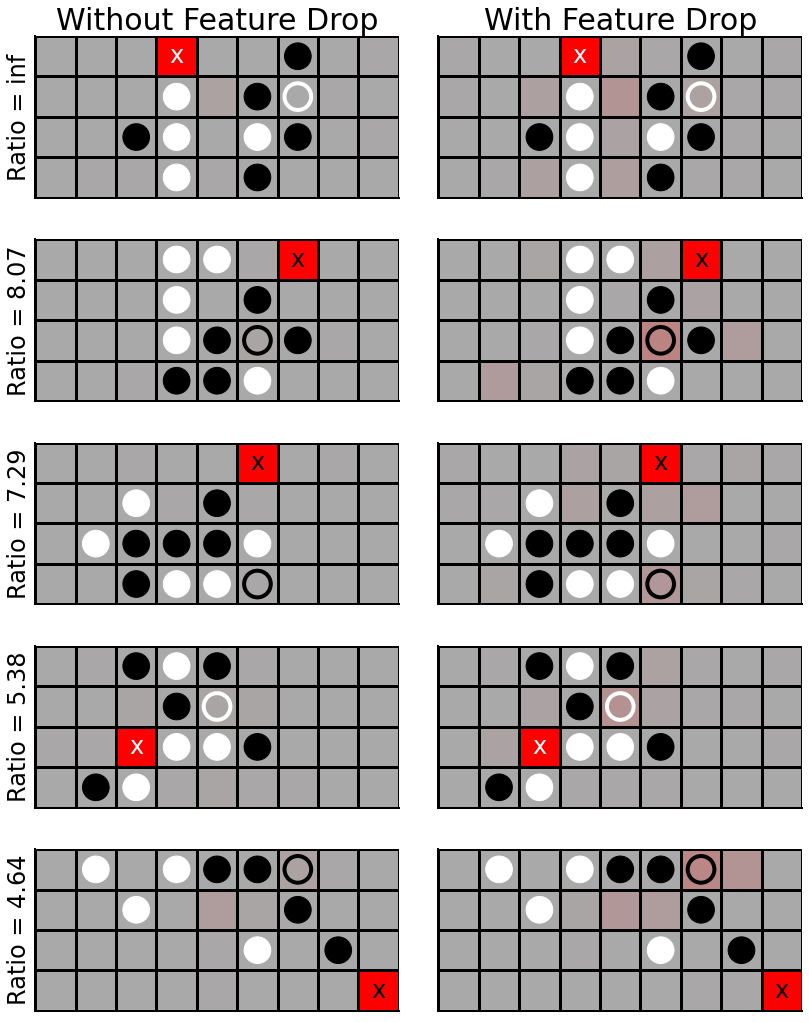

In [14]:
plot_example_boards((np.argsort(x_nodrop)[::-1])[[0,1,2,3,4]],x_nodrop,
                    h_nodrop,'Without Feature Drop','With Feature Drop',True,'Ratio = ',vmax=0.25)

In [15]:
import pickle
with open(direc + 'Analysis/Eye movements/eye_corrected.p','rb') as f:
    eye_corrected = pickle.load(f)
with open(direc + 'Analysis/Eye movements/data_game.p','rb') as f:
    data_game = pickle.load(f)
with open(direc + 'Analysis/Eye movements/eye_traces.p','rb') as f:
    eye_traces = pickle.load(f)
with open(direc + 'Analysis/Eye movements/regression_results.p','rb') as f:
    regression_results = pickle.load(f)
with open(direc + 'Analysis/Eye movements/eye_hist_norm.p','rb') as f:
    eye_hist_norm = pickle.load(f)

#actual_moves = [(np.array(list(d['move']))[None,:]==np.array(range(36))[:,None]).T for d in data_game]
#black_pieces = [np.vstack([(list(dd['bp'])) for i,dd in d.iterrows()]).astype(int) for d in data_game]
#white_pieces = [np.vstack([(list(dd['wp'])) for i,dd in d.iterrows()]).astype(int) for d in data_game]
#black_pieces = [bp*(a==0) for bp,a in zip(black_pieces,actual_moves)]
#white_pieces = [wp*(a==0) for wp,a in zip(white_pieces,actual_moves)]
#occupied_squares = [bp + wp for bp,wp in zip(black_pieces,white_pieces)]

In [16]:
player_id = move_stats[:,0]
board_id = np.hstack([np.arange(np.sum(player_id==i)) for i in range(10)])

In [17]:
from matplotlib import rcParams,font_manager,colors,patches

cm = colors.LinearSegmentedColormap.from_list('gray_gold_map', [colors.to_rgb('darkgray'), 
            colors.to_rgb('gold')], N=100)

def plot_example_boards_traces(ind,x,vmax=0.5):

    fig,axes=plt.subplots(len(ind),2,figsize=(12,3*len(ind)))

    for i,j in enumerate(ind):

        ax = axes[i][0]
        h= np.mean(h_main,2)

        ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
        ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')

        for k in range(36):
            if(black_pieces[j][k]):
                circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
                circ = ax.add_patch(circ)
            if(white_pieces[j][k]):
                circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
                circ = ax.add_patch(circ)
        k=np.argmax(h[j])
        ax.text(s='x',x=k%9,y=k//9,ha='center',va='center',fontsize=24,
               color=("black" if np.sum(occupied_squares[j])%2==0 else "white"))

        ax.imshow(np.reshape(h[j],[4,9]),
                   cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=vmax)
        k=human_move[j]
        circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                              color=("black" if np.sum(occupied_squares[j])%2==0 else "white"))
        circ = ax.add_patch(circ)
    
        ax = axes[i][1]

        ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
        ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')

        for k in range(36):
            if(black_pieces[j][k]):
                circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
                circ = ax.add_patch(circ)
            if(white_pieces[j][k]):
                circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
                circ = ax.add_patch(circ)
        k=human_move[j]
        circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                              color=("black" if np.sum(occupied_squares[j])%2==0 else "white"))
        circ = ax.add_patch(circ)

        p = player_id[j]
        n = board_id[j]
        t = data_game[p]['timestamp'][n]
        dt = data_game[p]['rt'][n]/1000+0.5

        e=eye_corrected[p]
        etdt = e[np.nonzero(e[:,0]>t)[0][0]-1:np.nonzero(e[:,0]<(t+dt))[0][-1]+1,:]

        if len(eye_traces[p][n]['durations'])>0:
            durations = eye_traces[p][n]['durations']
            board_coords = eye_traces[p][n]['board_coords']

        ax.imshow(np.zeros(shape=[4,9]), cmap=cm, 
                   interpolation='nearest',origin='lower',vmin=0,vmax=vmax)
        ax.scatter(board_coords[:-1,0],board_coords[:-1,1], marker='o', c='gold', 
                    s=1200*np.diff(etdt[:,0]),alpha=0.5,zorder=3)
        ax.plot(board_coords[:,0],board_coords[:,1],'-k',alpha=1,zorder=2)
        ax.axis('off')
    axes[0,0].set_title('Model prediction',fontsize=30)
    axes[0,1].set_title('Eye movements',fontsize=30)

    fig.tight_layout()
    #fig.savefig(fig_direc + 'figure_2a.pdf')
    plt.show()

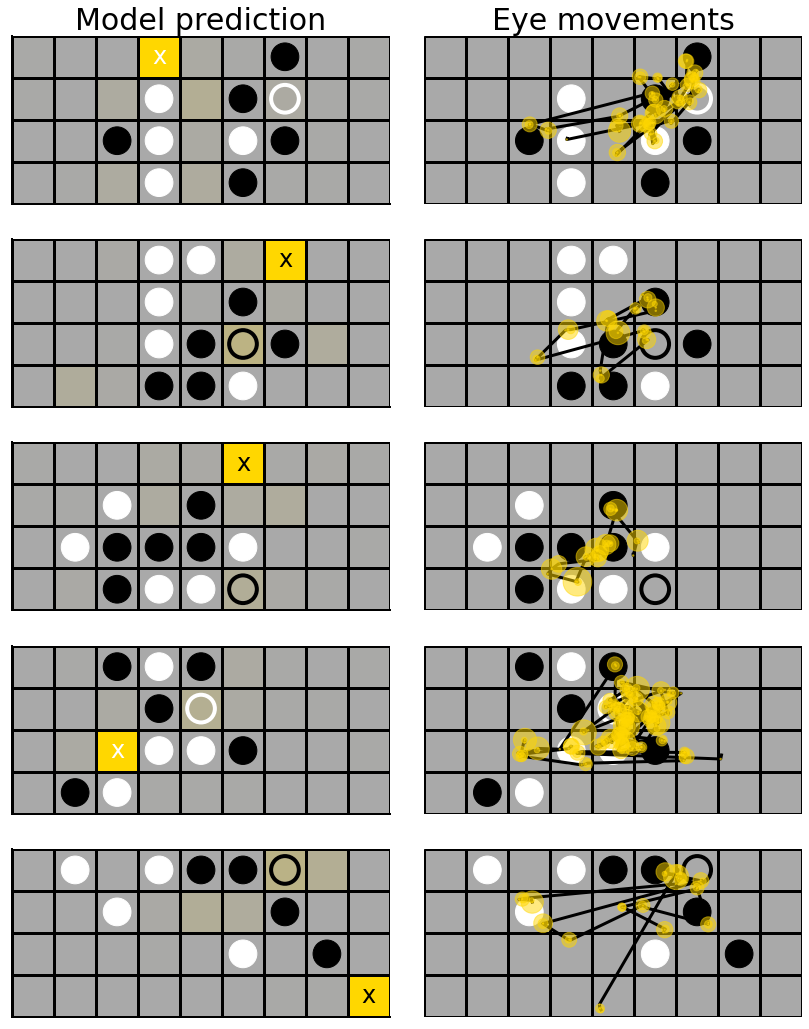

In [18]:
plot_example_boards_traces((np.argsort(x_nodrop)[::-1])[[0,1,2,3,4]],x_nodrop,vmax=0.25)

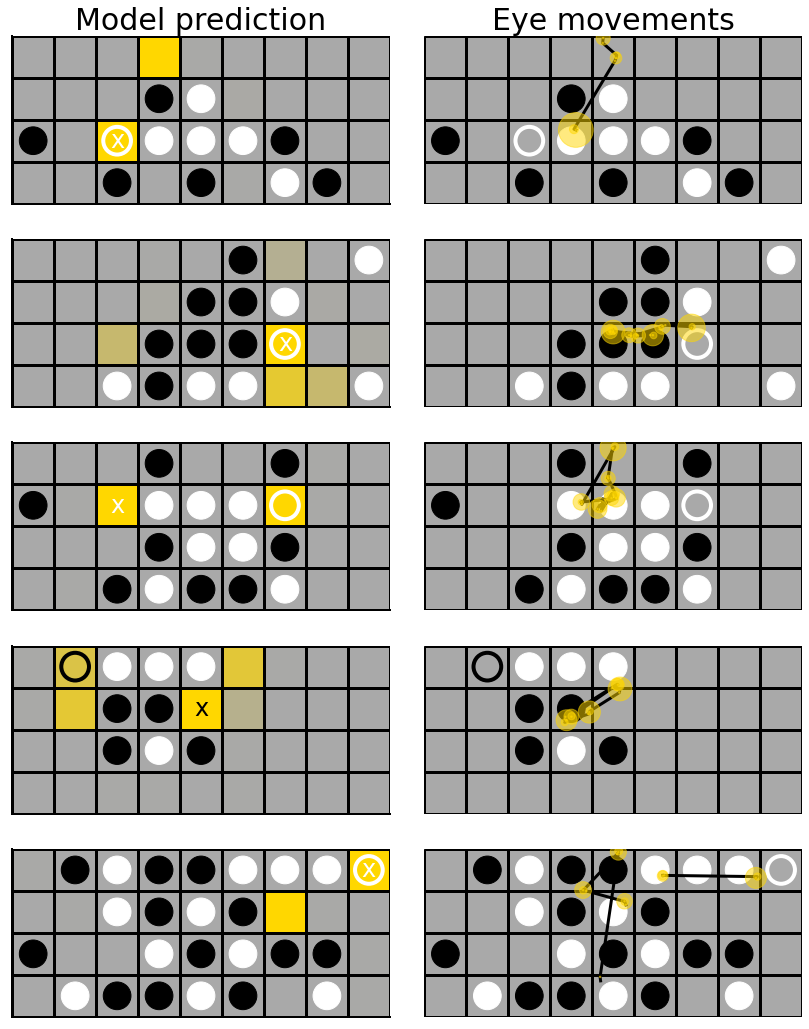

In [19]:
plot_example_boards_traces((np.argsort(x_nodrop))[[0,1,2,3,4]],x_nodrop,vmax=0.25)